In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import xarray as xr
import cartopy.crs as ccrs
import netCDF4 as nc
import pandas as pd

In [2]:
def areaavgTS(areafile,var,timelength):
    """ 
    Var needs to be 3D
    time length = num timesteps
    """
    # area is 96x144
    ads = xr.open_dataset(areafile)
    area = ads['AREA']
    area3D = np.tile(area,(timelength,1,1))
    vararea = var*area3D
    sumVarArea = np.sum(vararea,axis=(1,2))
    sumArea = np.sum(area,axis=(0,1))
    #print(sumVarArea.shape)
    # error occurs here
    #print(sumArea)
    output_core_dims=[["time"]]
    ar_avgd = sumVarArea/float(sumArea)
    return ar_avgd

In [3]:
def get_difference_data(file1,file2,var,multiplier):
#file 1 is forcing file, file2 is reference
    dsFOR = xr.open_dataset(file1)
    dsCT = xr.open_dataset(file2)
    VAR_FOR = np.array(dsFOR[var])*multiplier
    VAR_CT = np.array(dsCT[var])*multiplier
    changeVAR = VAR_FOR[:,:,:]- VAR_CT[0:108,:,:]
    return changeVAR

In [4]:
areafile = '/glade/work/smagahey/GEOG8130/data/project_results/surfdata_1.9x2.5_hist_78pfts_CMIP6_simyr1850_c190304.nc'
PI = "/glade/work/smagahey/GEOG8130/data/project_results/my_cesm.B1850.f19_g17.project_preindustrial.new.cam.SWCF.LWCF.0001-0010.nc"
CH4 = "/glade/work/smagahey/GEOG8130/data/project_results/my_cesm.B1850.f19_g17.ch4_perturbation.cam.new.h0.SWCF.LWCF.0001-0010.nc"




In [5]:
LWCF_diff = get_difference_data(CH4,PI,"LWCF",1)
SWCF_diff = get_difference_data(CH4,PI,"SWCF",1)
#LWCF_CH4 = get_difference_data(CH4,PI,"LWCF",1)
#SWCF_CH4 = get_difference_data(CH4,PI,"LWCF",1)

In [6]:
ar_LWCF_diff = areaavgTS(areafile,LWCF_diff,108)
ar_SWCF_diff = areaavgTS(areafile,SWCF_diff,108)

In [7]:
LWCF_pd = pd.Series(ar_LWCF_diff)
SWCF_pd = pd.Series(ar_SWCF_diff)
TS_SWCF = pd.Series(SWCF_pd.rolling(12).mean())
TS_LWCF = pd.Series(LWCF_pd.rolling(12).mean())

In [8]:
lat = np.linspace(-90,90,96)
lon = np.linspace(0,360,144)

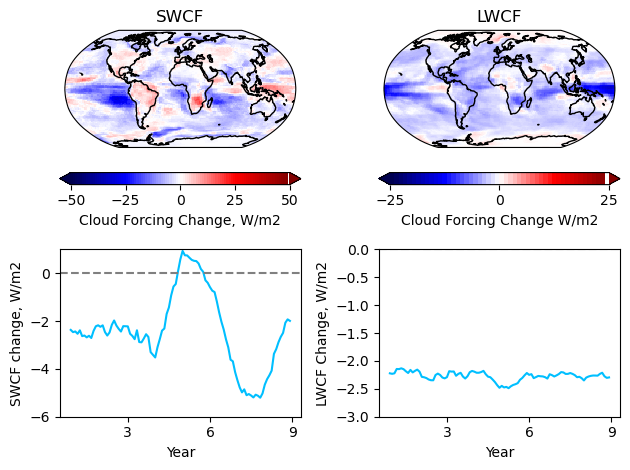

In [13]:
fig = plt.figure()
ticks = ([36,72,108])
labels = ([3,6,9])

ax1=fig.add_subplot(2,2,1,projection=ccrs.Robinson(central_longitude=0, globe=None))
bounds1 = np.arange(-50,50,1)
ax1.coastlines()
a = plt.pcolormesh(lon,lat,np.nanmean(SWCF_diff,axis=0),transform = ccrs.PlateCarree(),cmap='seismic',vmin=-50,vmax=50) # add vmin, vmax
cbar1 = plt.colorbar(a,label='Cloud Forcing Change, W/m2', orientation="horizontal",extend = 'both',ax=ax1,drawedges=False,boundaries = bounds1)
cbar1.set_ticks([-50,-25,0,25,50])
#cbar1.set_ticklabels(["A", "B", "C", "D"])
plt.title('SWCF') 
plt.tight_layout()

ax2 = fig.add_subplot(2,2,2,projection=ccrs.Robinson(central_longitude=0, globe=None))
bounds2 = np.arange(-25,25,1)
ax2.coastlines()
b = plt.pcolormesh(lon,lat,np.nanmean(LWCF_diff,axis=0),transform = ccrs.PlateCarree(),cmap='seismic',vmin=-25,vmax=25) # add vmin, vmax
cbar2 = plt.colorbar(b,label='Cloud Forcing Change W/m2', orientation="horizontal",extend = 'both',ax=ax2,drawedges=False,boundaries = bounds2)
cbar2.set_ticks([-25,0,25])
plt.title('LWCF')
plt.tight_layout()

ax3 = fig.add_subplot(2,2,3)
plt.plot(TS_SWCF,"deepskyblue")
plt.ylabel("SWCF change, W/m2")
plt.ylim(-6,1)
#plt.title("S)
plt.xticks(ticks,labels)
plt.xlabel("Year")
plt.axhline(y=0, color='grey', linestyle='--')
plt.tight_layout()

ax4 = fig.add_subplot(2,2,4)
plt.plot(TS_LWCF,"deepskyblue")
plt.ylabel("LWCF Change, W/m2")
plt.ylim(-3,0)
#plt.title('PRECT')
plt.xticks(ticks,labels)
plt.xlabel("Year")
plt.axhline(y=0, color='grey', linestyle='--')
plt.tight_layout()

plt.savefig("Cloud_forcing.png")


In [10]:
TS_SWCF.max()

0.93538981375443